In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


# Load Data

In [2]:
# Melakukan import csv
df = pd.read_csv("marketing_campaign_data.csv")
df.head(12)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0
5,5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,...,6,0,0,0,0,0,0,3,11,0
6,6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,...,6,0,0,0,0,0,0,3,11,0
7,7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,...,8,0,0,0,0,0,0,3,11,0
8,8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,...,9,0,0,0,0,0,0,3,11,1
9,9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,...,20,1,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [4]:
print(df.isnull().values.any())
print(df.isna().sum())

True
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [5]:
# menghapus nilai nan pada income
df['Income'].fillna(df['Income'].mean(), inplace=True)


In [6]:
print(df.isnull().values.any())
print(df.isna().sum())

False
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [7]:
# cek duplikate
df.duplicated().sum()

0

#  Feature engineering:

### conversion rate

In [8]:
df['NumWebVisitsMonth'].unique()


array([ 7,  5,  4,  6,  8,  9, 20,  2,  3,  1, 10,  0, 14, 19, 17, 13],
      dtype=int64)

In [9]:
visitors = df.groupby(['Education']).agg({'NumWebVisitsMonth' : 'count'}).reset_index()
visitors

,Education,NumWebVisitsMonth
0,D3,203
1,S1,1127
2,S2,370
3,S3,486
4,SMA,54


In [10]:
df['conversion_rate'] = df['Response'] / df['NumWebVisitsMonth']
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion_rate
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,0,0,0,0,0,0,3,11,1,0.142857
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,0,0,0,0,0,0,3,11,0,0.000000
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,0,0,0,0,0,0,3,11,0,0.000000
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,0,0,0,0,0,0,3,11,0,0.000000
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,0,0,0,0,0,0,3,11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,...,0,0,0,0,0,0,3,11,0,0.000000
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,...,0,0,0,1,0,0,3,11,0,0.000000
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,...,0,1,0,0,0,0,3,11,0,0.000000
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,...,0,0,0,0,0,0,3,11,0,0.000000


### umur

In [11]:
def kelompok_usia(x):
    if x['Year_Birth'] <= 1954:
        kelompok = 'Lansia'
    elif x['Year_Birth'] >= 1955 and x['Year_Birth'] <= 1993: 
        kelompok = 'Dewasa'
    else: 
        kelompok  = 'Remaja'
    return kelompok  

df['grup_umur'] = df.apply(lambda x: kelompok_usia(x), axis=1)

### jumlah anak, total transaksi, total pengeluaran

In [12]:
df['jumlah_anak'] = df['Kidhome'] + df['Teenhome']
df['total_transaksi'] = df['MntCoke']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df['total_pengeluaran'] = df['Income'] - df['total_transaksi'] 
df['total_acc_cmp'] = df['AcceptedCmp2'] + df['AcceptedCmp1'] + df['AcceptedCmp5'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] 


# Exploration Data Analysis

## Descriptive Statistics

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

### A. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [14]:
print(df.isnull().values.any())
print(df.isna().sum())

True
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  0
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
conversion_rate        11
grup_umur               0
jumlah_anak             0
total_transaksi         0
total_pengeluaran       0
total_acc_cmp           0
dtype: int64


hasilnya ialah True yang berarti memang ada nilai yang memiliki nilai null

### B. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/ mean/ median/ max/ unique/ top/ freq)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2240 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [30]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['Response','Unnamed: 0','ID','AcceptedCmp2','AcceptedCmp1','AcceptedCmp5','AcceptedCmp3','AcceptedCmp4','Z_CostContact','Z_Revenue'],inplace=True)
num = num.columns
cats = ['Education','Marital_Status','Dt_Customer','grup_umur']

In [31]:
df[num].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,conversion_rate,jumlah_anak,total_transaksi,total_pengeluaran,total_acc_cmp,age
count,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2229.000000,2240.000000,2.240000e+03,2.240000e+03,2240.000000,2240.000000
mean,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,27062.946429,...,2.662054,5.790179,5.316518,0.009375,0.043686,0.950446,6.057982e+05,5.164145e+07,0.297768,54.194196
std,11.984069,2.503780e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,41280.498488,...,2.923101,3.250958,2.426645,0.096391,0.142981,0.751803,6.022493e+05,2.464159e+07,0.678381,11.984069
min,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+03,7.170000e+05,0.000000,27.000000
25%,1959.000000,3.553875e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,6.875000e+04,3.546150e+07,0.000000,46.000000
50%,1970.000000,5.174150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,3.960000e+05,5.114750e+07,0.000000,53.000000
75%,1977.000000,6.828975e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,33000.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,1.000000,1.045500e+06,6.708925e+07,0.000000,64.000000
max,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,3.000000,2.525000e+06,6.666040e+08,4.000000,130.000000


In [18]:
df[cats].describe()

,Education,Marital_Status,Dt_Customer,grup_umur
count,2240,2240,2240,2240
unique,5,6,663,3
top,S1,Menikah,31-08-2012,Dewasa
freq,1127,864,12,1911


##  **Univariate Analysis**

In [19]:
# plt.figure(figsize=(12, 8))
# for i in range(0, len(num)):
#     plt.subplot(2,4, i+1)
#     sns.boxplot(df[num[i]], color='lightseagreen')
#     plt.title('Boxplot of {}'.format(num[i]))
#     plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
#     plt.tight_layout()
# plt.show()

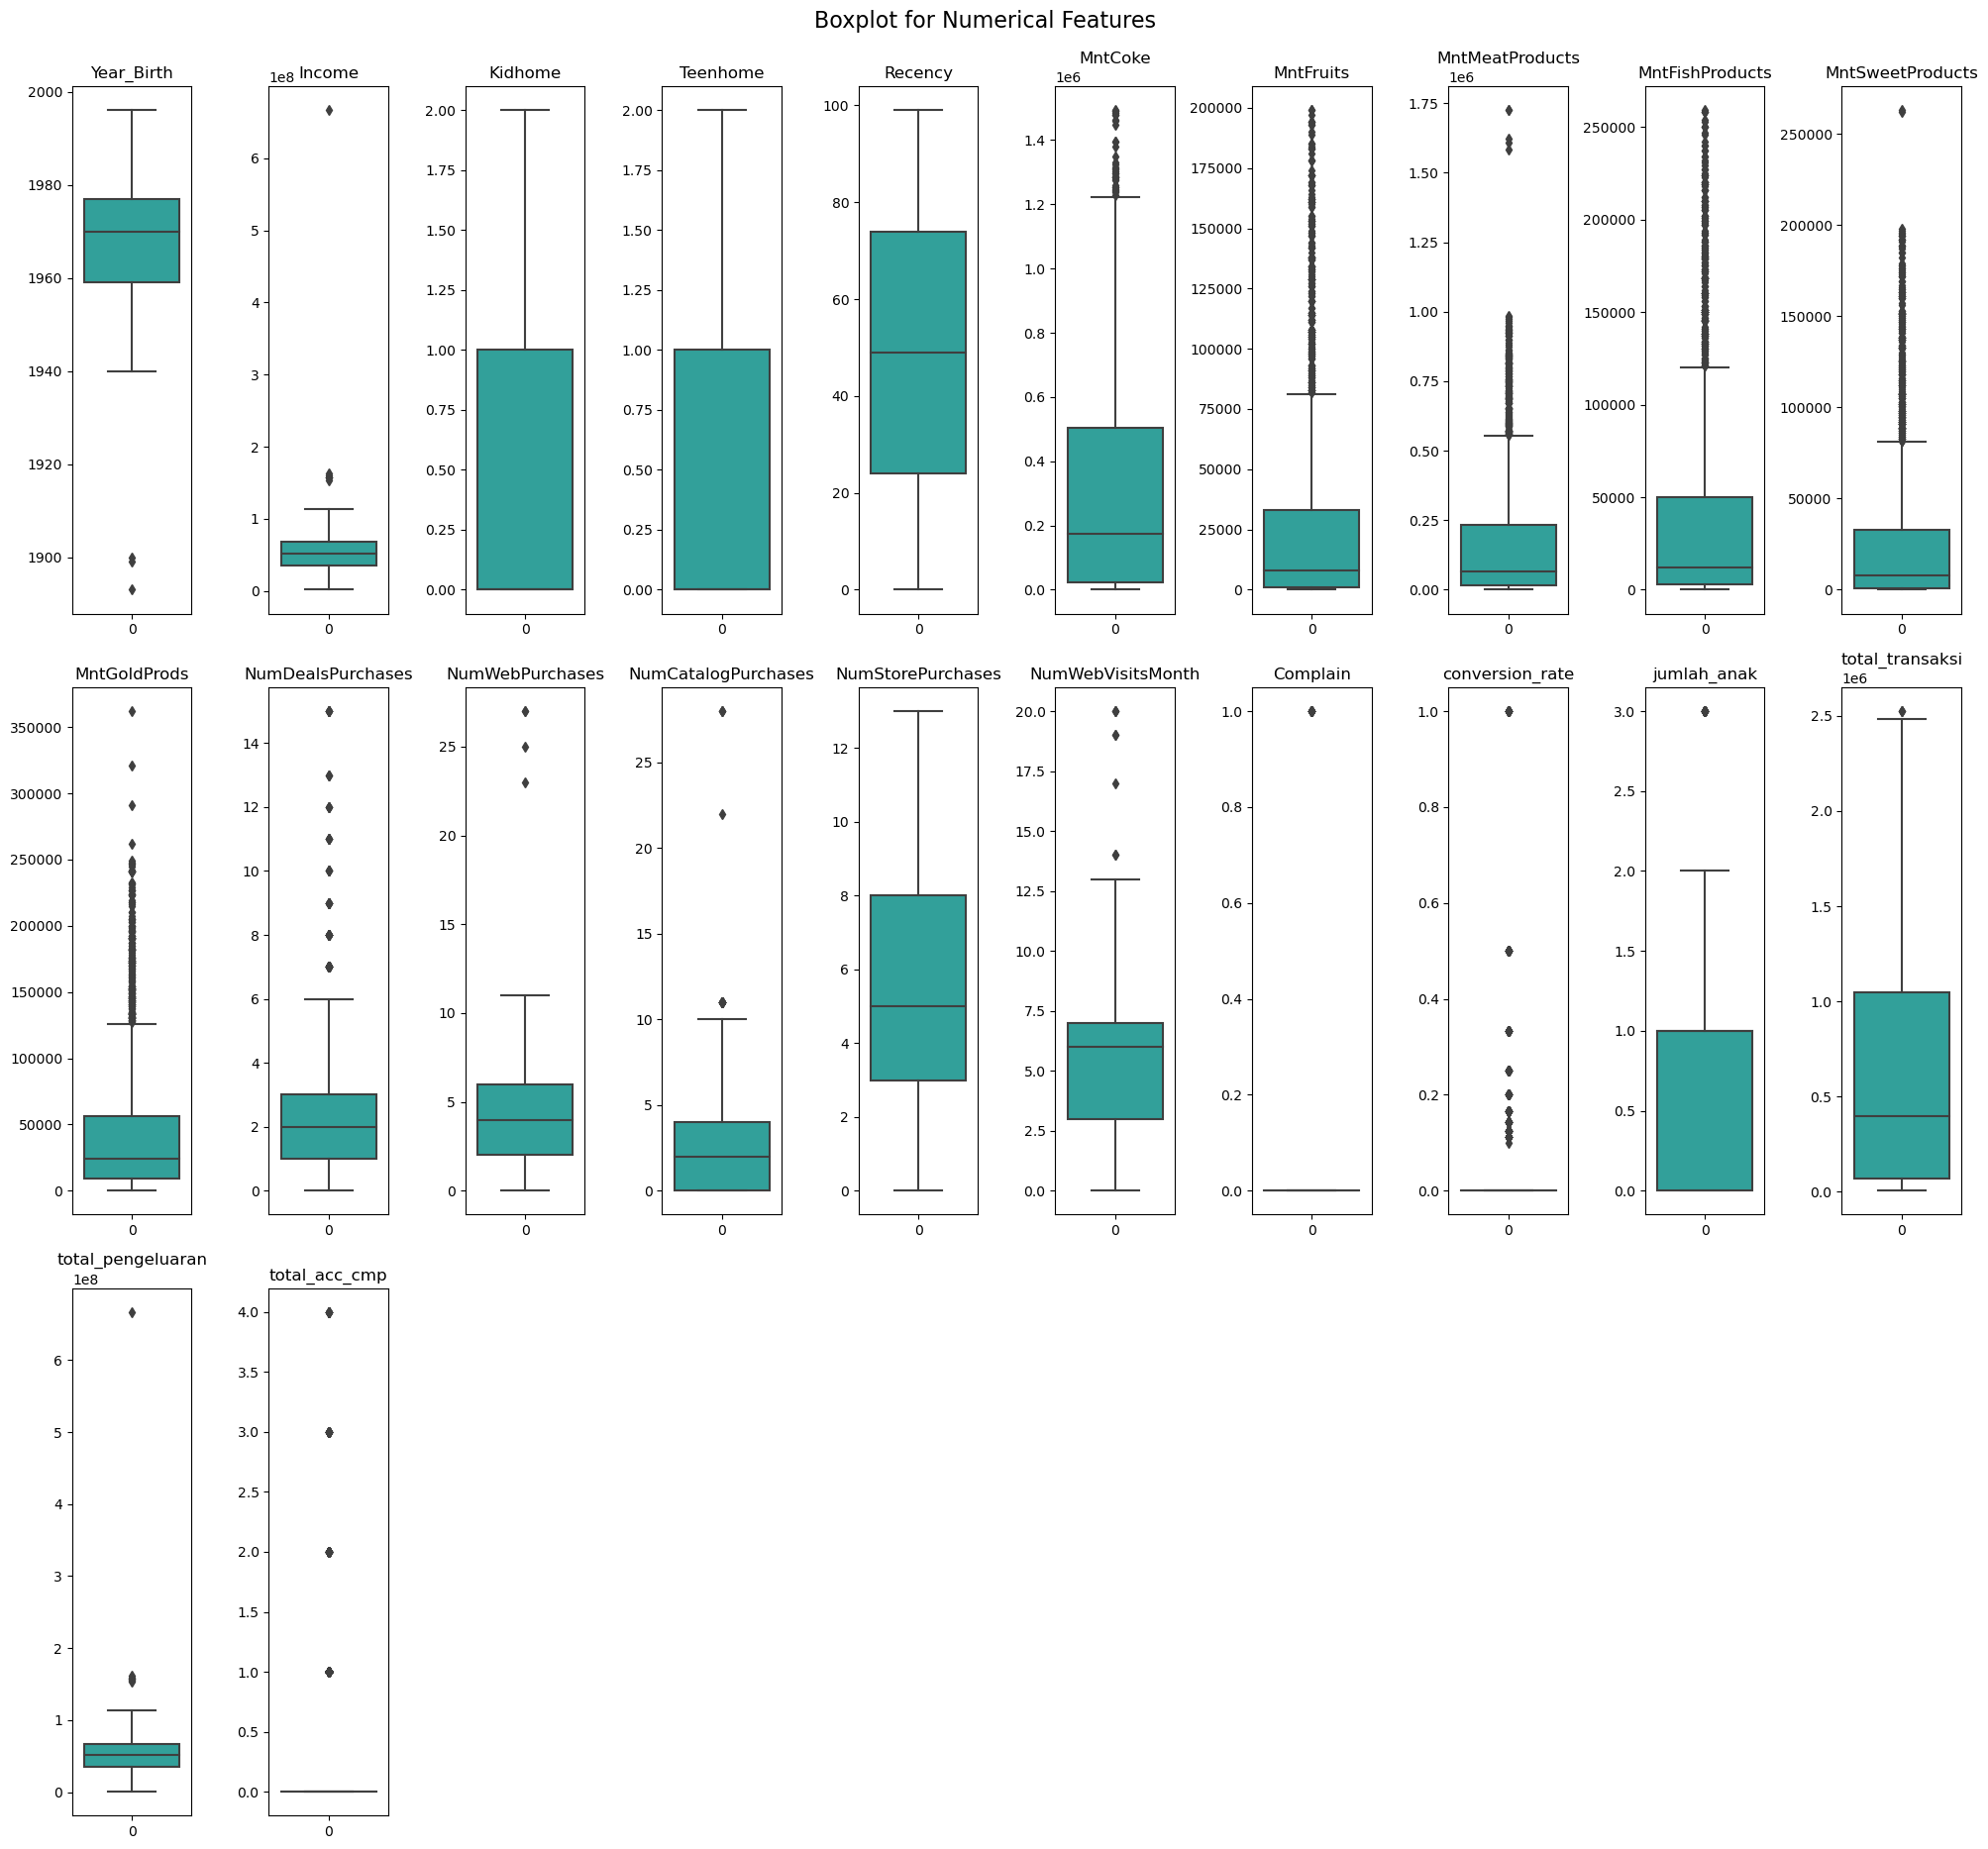

In [20]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.boxplot(df[num[i]], color='lightseagreen')
    plt.title(format(num[i]))
    plt.suptitle('Boxplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout()
plt.show()

dapat dilihat dari boxplot diatas, tidak ada outlier yang tidak terlalu jauh dari data lainnya dan tidak mempengaruhi hasil analisis data

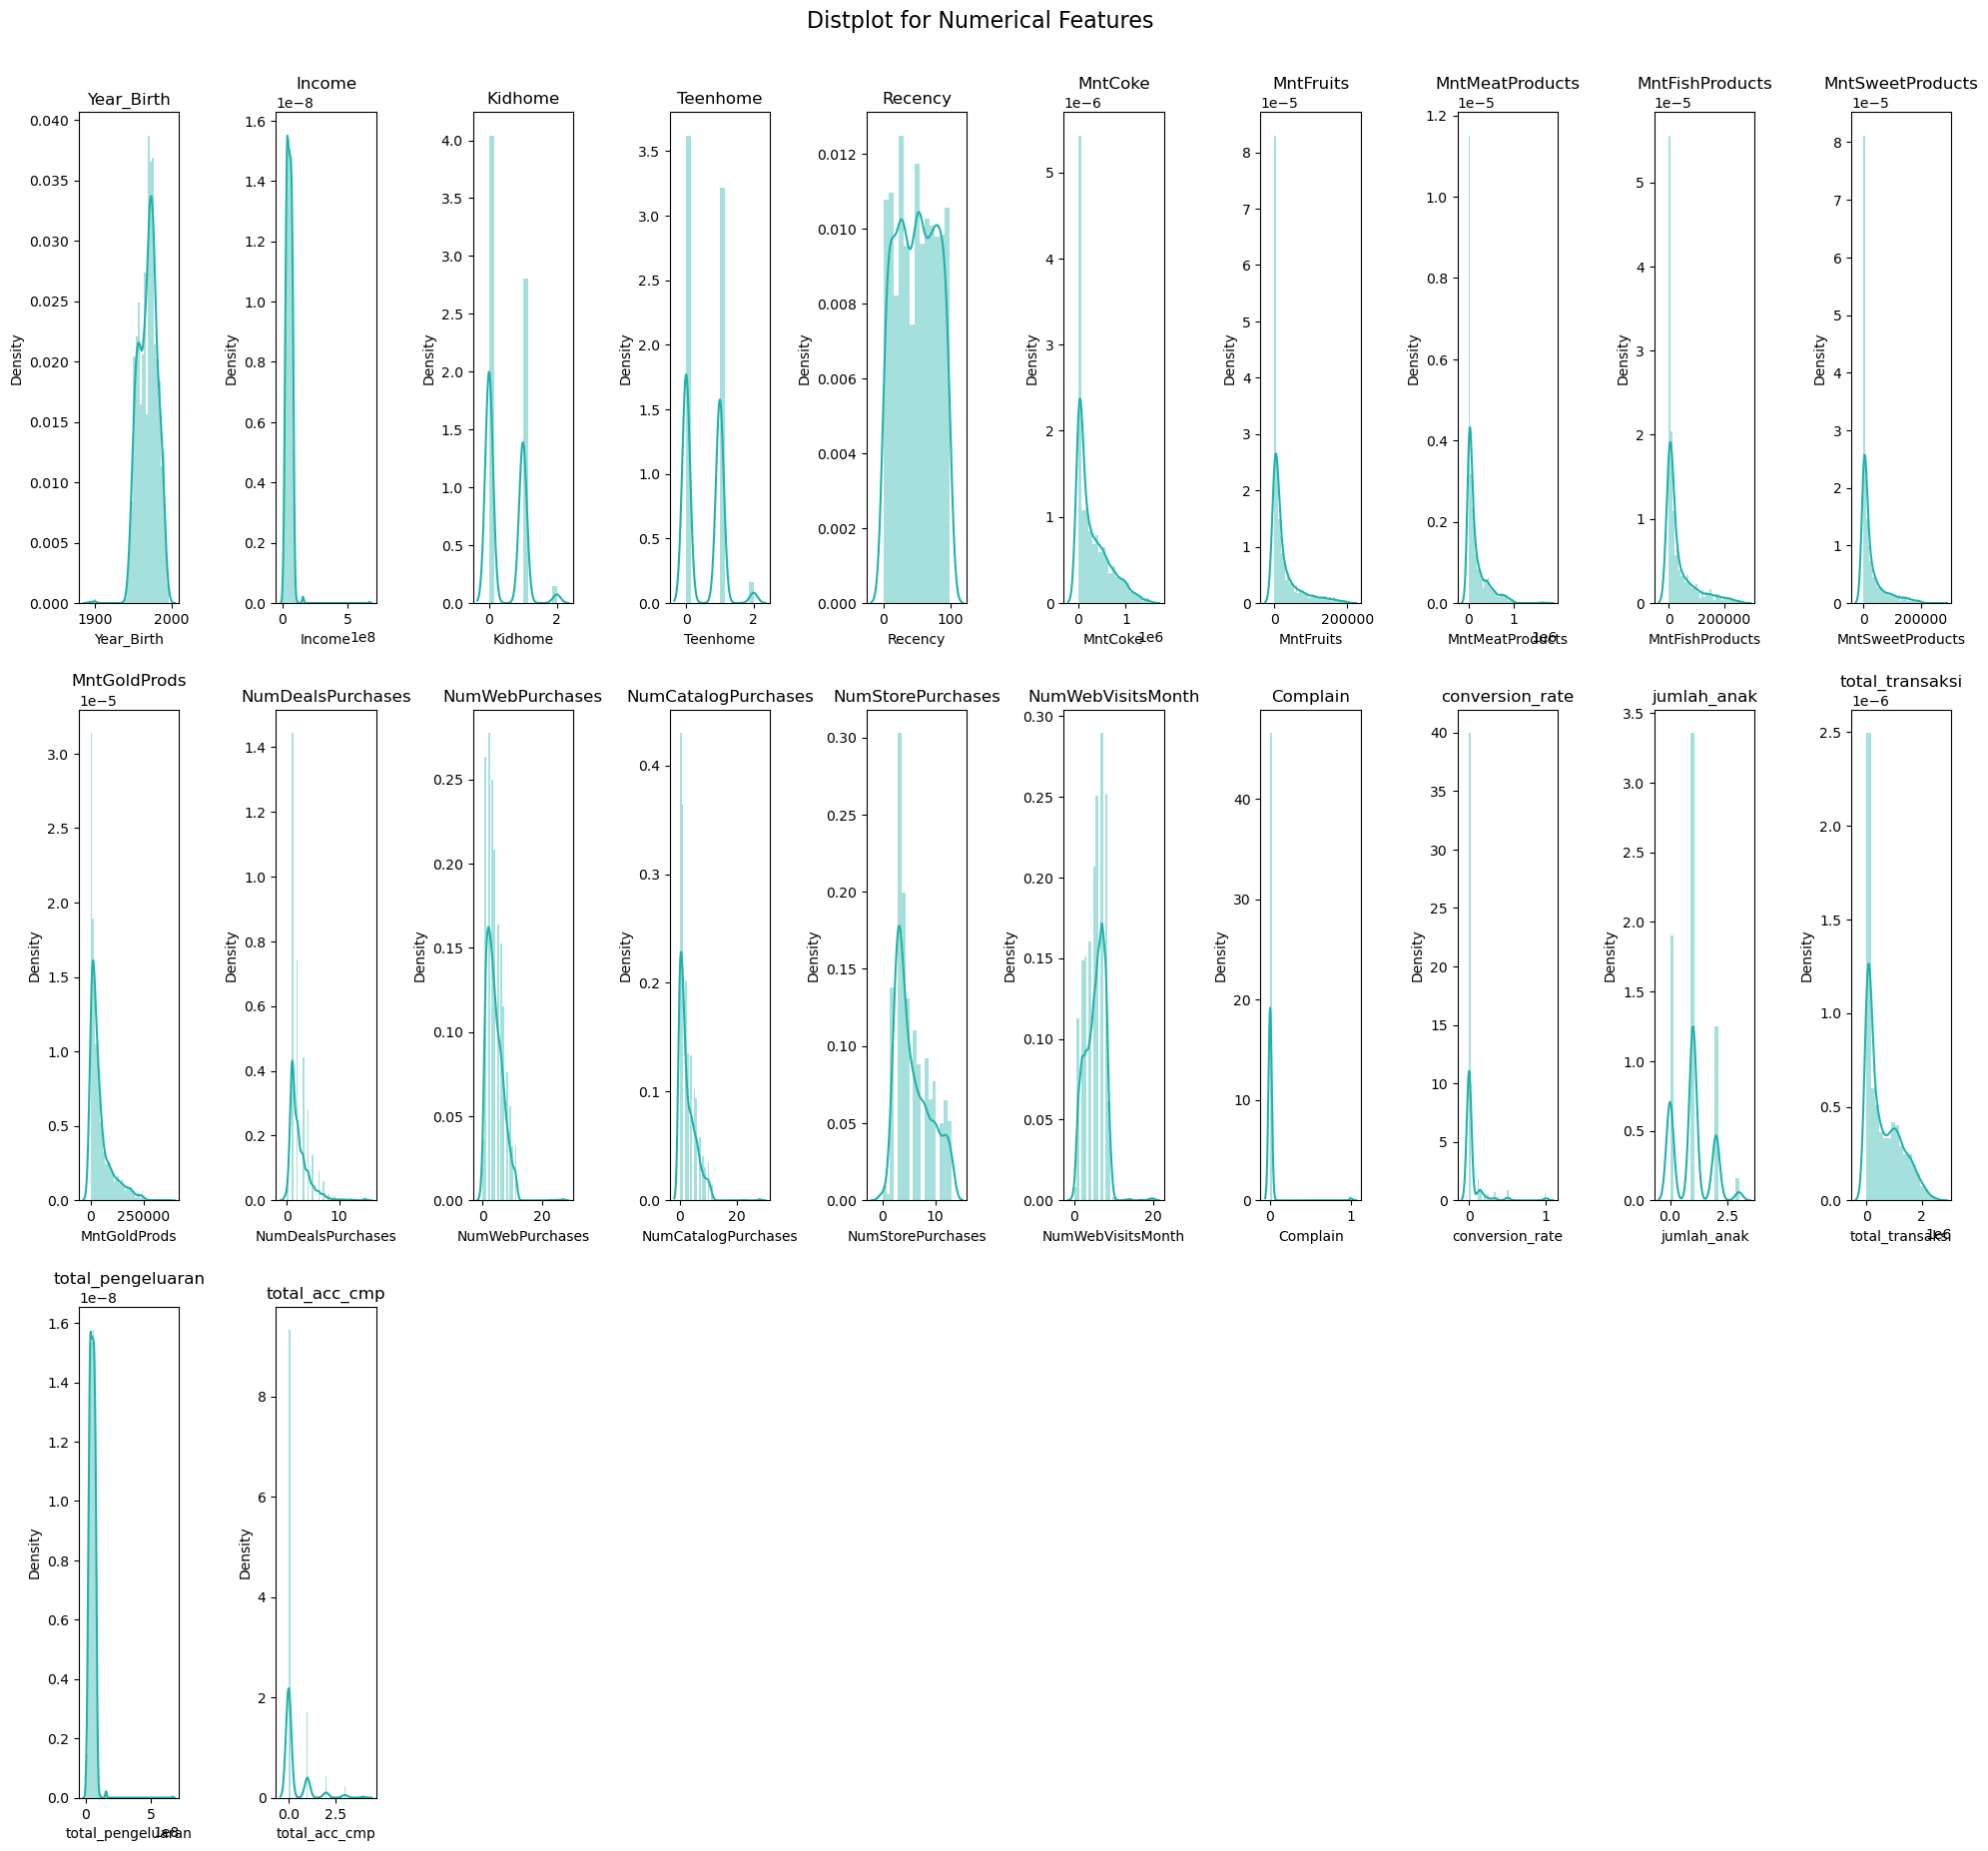

In [21]:
plt.figure(figsize=(20, 19))
for i in range(0, len(num)):
    plt.subplot(3,10, i+1)
    sns.distplot(df[num[i]], color='lightseagreen')
    plt.title(format(num[i]))
    plt.suptitle('Distplot for Numerical Features\n', fontsize=16, fontweight='medium')
    plt.tight_layout(pad=2)

* distribusi normal dimiliki 'total_transaksi', NumWebVisitsMonth, NumStorePurchases, NumWebPurchases, NumDealsPurchases, Recency, Year_Birth
* positively skewed dimiliki MntCoke, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, conversion_rate
* bimodal atau lebih dari 1 dimiliki total_acc_cmp, jumlah_anak, Kidhome, Teenhome

## Multivariate Analysis

<Axes: >

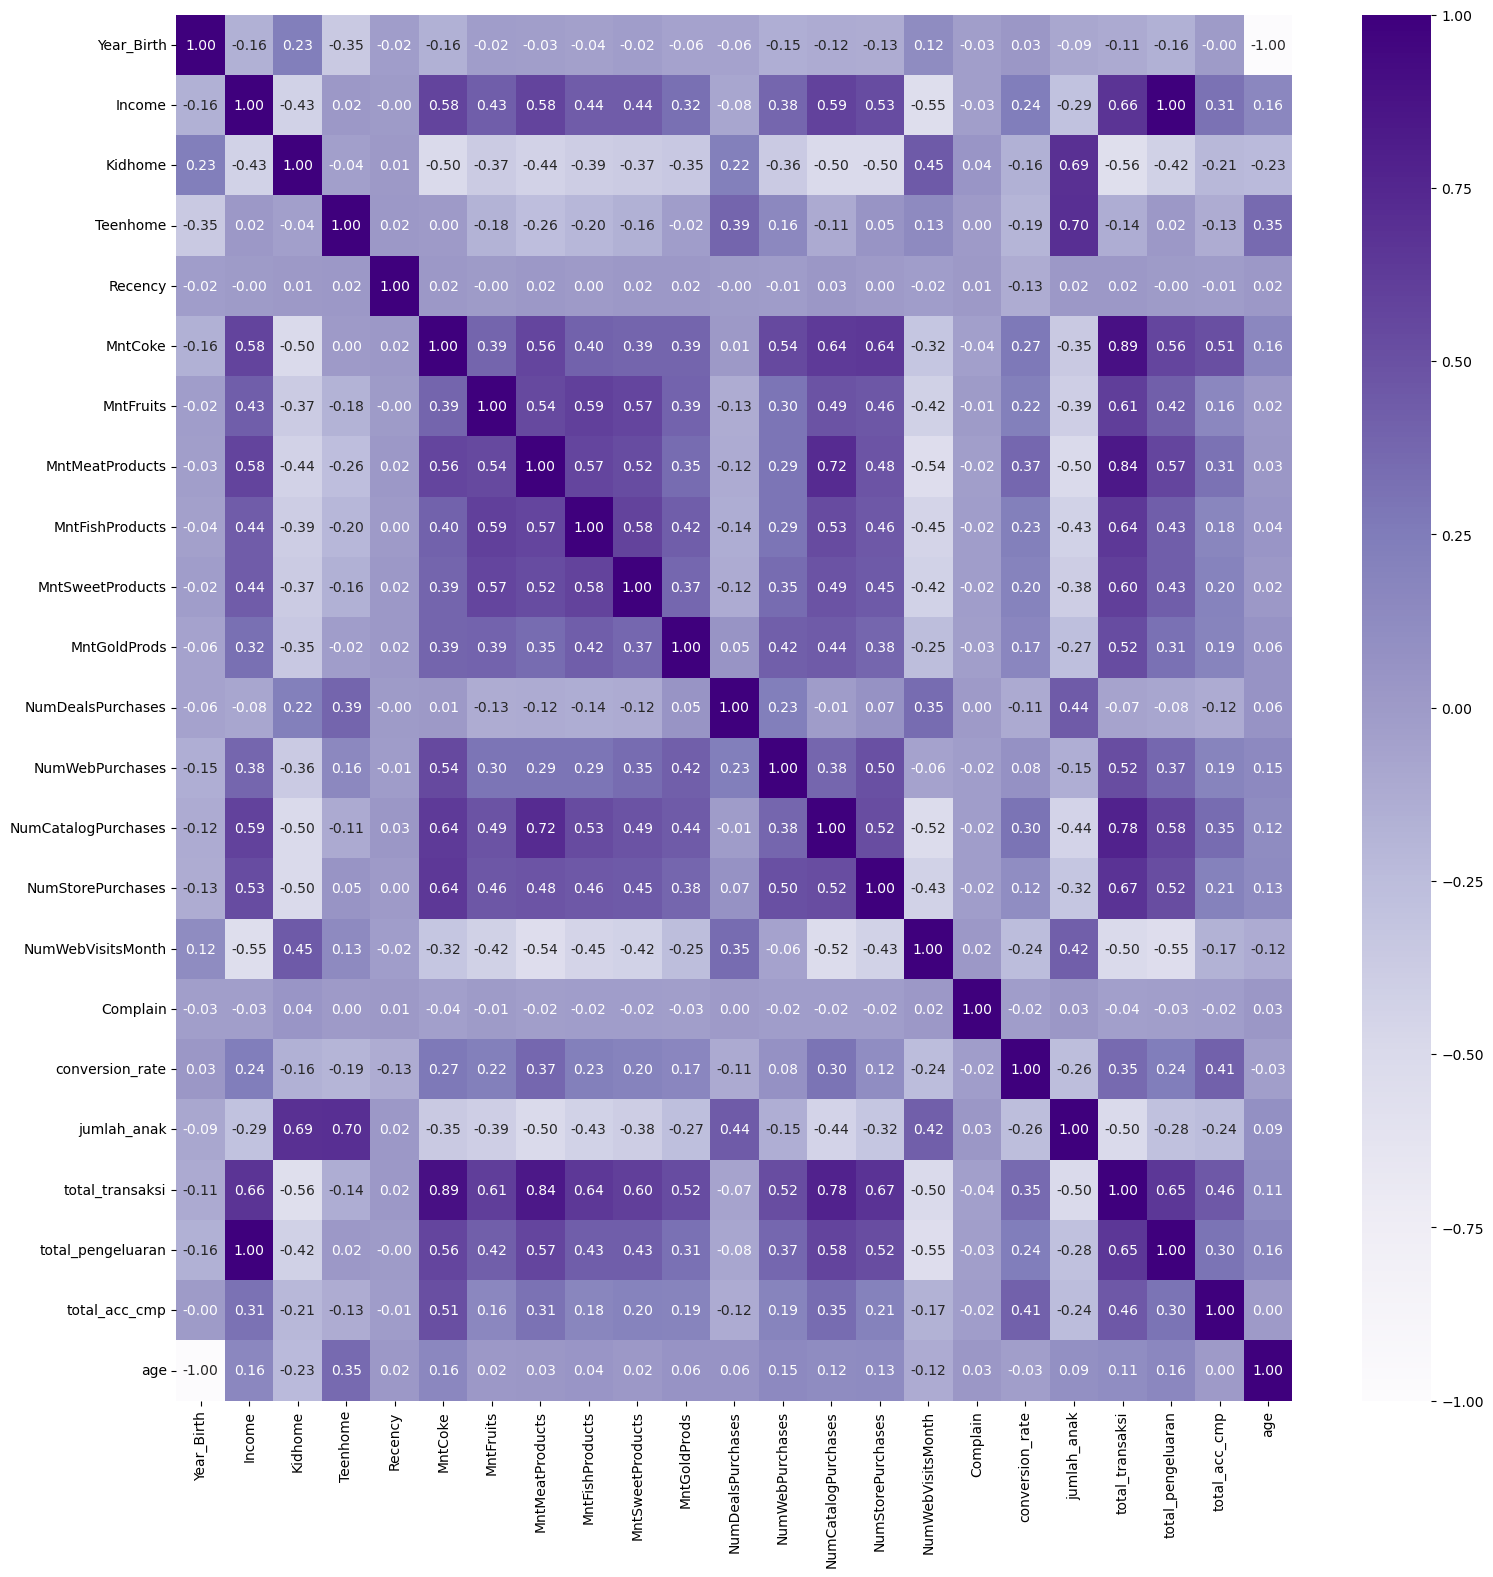

In [32]:
plt.figure(figsize=(18, 18))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')


Berdasarkan gambar diats, tidak ada hubungan yang signifikan antara umur customer dengan conversion rate. Hal ini dapat dilihat dari nilai koefisien korelasi, yang adalah 0,02. Nilai koefisien korelasi tersebut sangat kecil, sehingga menunjukkan bahwa hubungan antara umur customer dengan conversion rate sangat lemah.

#### df['Year_Birth'].min()


In [23]:
# print(df.loc[0, "Dt_Customer"])


In [24]:
# df['Year_Birth'].min()


In [25]:
# df['Year_Birth'].unique()
